<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/ml_zoomcamp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv

In [93]:

!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv

--2024-10-08 13:58:14--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2024-10-08 13:58:14 (21.7 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [94]:
df = pd.read_csv('data.csv')

In [95]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [96]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [97]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [98]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [99]:
df.dtypes[df.dtypes == 'object']

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


In [100]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [101]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [102]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [103]:
len(df.columns)

16

In [104]:
for col in strings:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16



In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

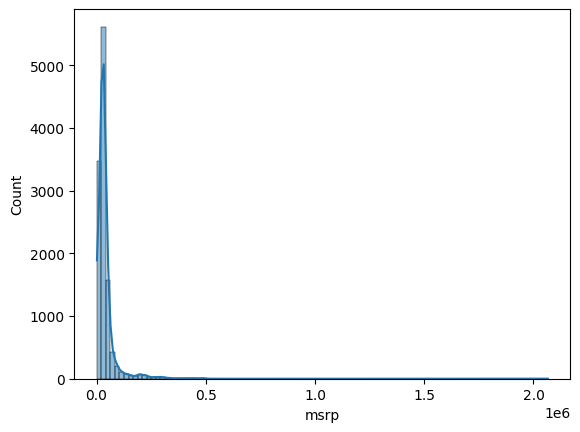

In [106]:
sns.histplot(df.msrp, bins=100, kde=True)

<Axes: xlabel='year', ylabel='msrp'>

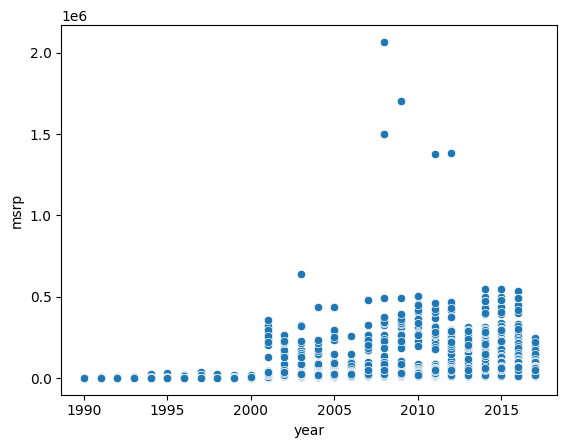

In [107]:
sns.scatterplot(x=df.year, y=df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

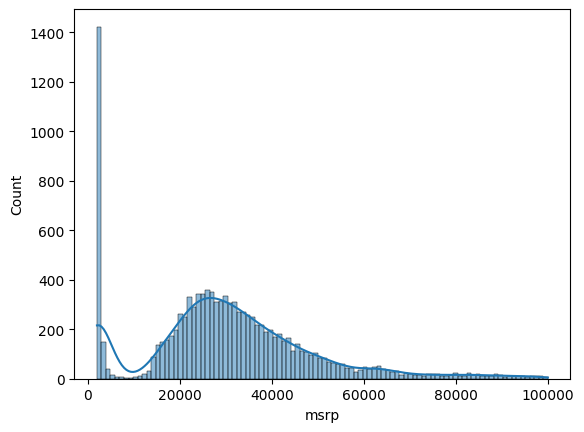

In [108]:
sns.histplot(df.msrp[df.msrp < 100000], bins=100, kde=True)

In [109]:
np.log([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<ipython-input-109-2bea43289fd5>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
       2.30258509])

In [110]:
np.log1p([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527])

<Axes: xlabel='msrp', ylabel='Count'>

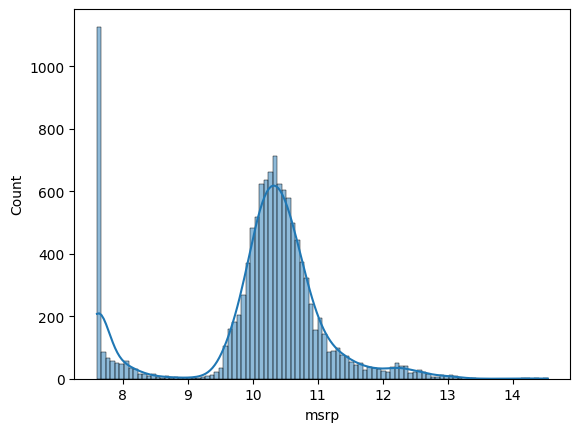

In [111]:
sns.histplot(np.log(df.msrp), bins=100, kde=True)

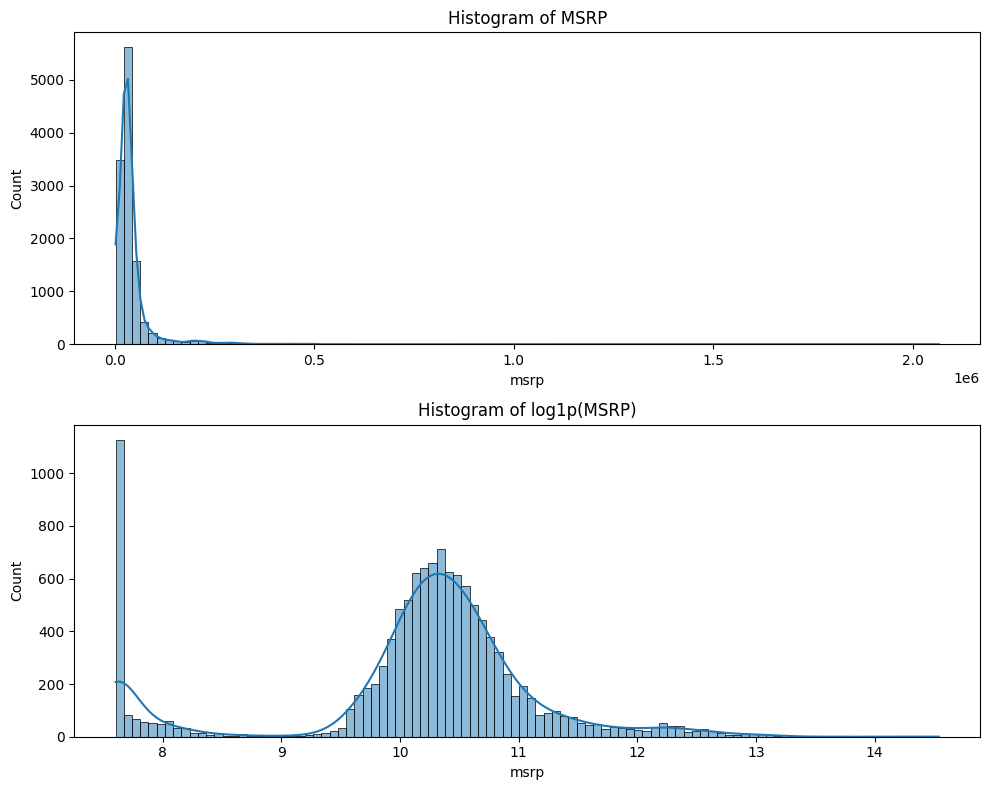

In [112]:
# prompt: i want to compare the histplot of df.msrp and log1p(df.msrp) in two charts up and down

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df.msrp, bins=100, kde=True, ax=axs[0])
axs[0].set_title('Histogram of MSRP')

sns.histplot(np.log1p(df.msrp), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Histogram of log1p(MSRP)')

plt.tight_layout()
plt.show()


In [113]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


# 2.4 Setting up a validation framework


lets build this

In [114]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

In [115]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [116]:
df.iloc[:2]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


we need to shuffle the data before we split so that ther will be different or random data in all the datasets instead of same data.


In [117]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [118]:
idx = np.arange(n)

In [119]:
np.random.seed(2)
np.random.shuffle(idx)

In [120]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [121]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [122]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [123]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [124]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
np.log1p(df_train.msrp.values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [126]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [127]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [128]:
len(y_train)

7150

# Linear Regression Theory

g(x) = y

g is model
x is the training gataset and y is the resulting training output


In [129]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [130]:
df.columns[df.dtypes == 'int']

Index(['year', 'highway_mpg', 'city_mpg', 'popularity', 'msrp'], dtype='object')

g(xi) = wo +w1xi1 + w2xi2 + w3xi3


In [131]:
df_train.iloc[0]

,0
make,chevrolet
model,cobalt
year,2008
engine_fuel_type,regular_unleaded
engine_hp,148.0
engine_cylinders,4.0
transmission_type,manual
driven_wheels,front_wheel_drive
number_of_doors,2.0
market_category,NaN


In [132]:
df_train[['engine_hp','city_mpg','popularity']].iloc[0]

,0
engine_hp,148.0
city_mpg,24.0
popularity,1385.0


In [133]:
w0 = 0
w = [1,1,1]

In [134]:
def lr1(xi):
  n = len(xi)
  pred = w0
  for j in range(n):
    pred = pred  + w[j] * xi[j]
  return pred

In [135]:
xi = [227,21,870]

In [136]:
# prompt: # prompt: how to see the msrp in df where engine_hp is equal to 227.0 and city)mpg = 21 and popularity == 870

df[(df.engine_hp == 227.0) & (df.city_mpg == 21) & (df.popularity == 870) & (df.year == 2013)]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2105,volvo,c30,2013,regular_unleaded,227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury",compact,2dr_hatchback,29,21,870,25500
2106,volvo,c30,2013,regular_unleaded,227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,29,21,870,27850


In [137]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [138]:
res = lr1(xi)
res

12.312

since we have applied log1p at the first to convert this into a normal distribution. lets convert the results back into its original form by applying exponential.

In [139]:
final_Res = np.expm1(res)
final_Res

222347.2221101062

In [140]:
df[(df.engine_hp == 453) & (df.city_mpg == 11) & (df.popularity == 86)]#& (df.year == 2013)]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7553,rolls-royce,phantom_coupe,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,coupe,19,11,86,433550
7554,rolls-royce,phantom_coupe,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,coupe,19,11,86,438325
7555,rolls-royce,phantom_coupe,2016,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,coupe,19,11,86,449525
7556,rolls-royce,phantom_drophead_coupe,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,474600
7557,rolls-royce,phantom_drophead_coupe,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,479775
7558,rolls-royce,phantom_drophead_coupe,2016,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,492000
7559,rolls-royce,phantom,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,402940
7560,rolls-royce,phantom,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,474990
7561,rolls-royce,phantom,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,407400
7562,rolls-royce,phantom,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,480175


g(x) = w0*x0 + w1x1 + w2x2 + .....
x0 = 1 we assume just to simplify this dot product
so we finally can say that   
w = [w0, w1,w2,....]
x= [x0,x1,x2,.....]
so that the final y  = w.x where it is the dot procut of w and x vectors


In [141]:
x = [1] +xi
wnew = [w0] + w

In [142]:
def lr(x,w):
  return np.dot(x,w)

In [143]:
lr(x,wnew)

12.312

In [144]:
x1 = [1]+ list(df[(df.columns[df.dtypes == 'int']) ].iloc[123])
x1

[1, 2014, 35, 29, 586, 14720]

In [145]:
# prompt: how to exclude the msrp and year columns in the above list in a short form

x1 = [1] + list(df[(df.columns[df.dtypes == 'int'])[~df.columns[df.dtypes == 'int'].isin(['msrp', 'year'])]].iloc[123])
x2 = [1] + list(df[(df.columns[df.dtypes == 'int'])[~df.columns[df.dtypes == 'int'].isin(['msrp', 'year'])]].iloc[500])
x3 = [1] + list(df[(df.columns[df.dtypes == 'int'])[~df.columns[df.dtypes == 'int'].isin(['msrp', 'year'])]].iloc[1000])

actual_Res = df['msrp'].iloc[123],df['msrp'].iloc[500],df['msrp'].iloc[1000]
x1,x2,x3,actual_Res

([1, 35, 29, 586], [1, 22, 17, 2031], [1, 24, 15, 1715], (14720, 42325, 3578))

In [146]:
w = [7.17, 0.01, 0.04, 0.002]


In [147]:
x = [x1,x2,x3]
x = np.array(x)
x

array([[   1,   35,   29,  586],
       [   1,   22,   17, 2031],
       [   1,   24,   15, 1715]])

In [148]:
def lr3(x,w):
  return np.expm1x(np.dot(x,w))

In [149]:
lr3(x,w)

array([ 18995.30945365, 185719.84648883,  92966.01204336])

y = wx
sow how to calculate w we do this by taking inverse of x and multiplying it with y but mostly inverse of x does not exist as x is a rectangular matrix mostly
w = x-1 * y
so lets multiply xt on both sides
xt*y = xt*x* w
so w = (xt*x)-1 * (xt*y)


In [150]:
def data_prep(n,df):
  r = np.random.randint(0,10000,n)
  x=[]
  act_res = []
  for i in r:
    k = [1] + list(df[(df.columns[df.dtypes == 'int'])[~df.columns[df.dtypes == 'int'].isin(['msrp', 'year'])]].iloc[i])
    j = df['msrp'].iloc[i]
    x.append(k)
    act_res.append(j)
  x = np.array(x)
  act_res = np.array(act_res)
  return x,act_res

In [151]:
def train_linear_reg(n,df):
  x,y = data_prep(n,df)
  xtx = x.T.dot(x)
  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)
  return w_full

In [152]:
x,actual_Res = data_prep(10,df)

In [153]:
xtx = x.T.dot(x)

In [154]:
xtx_inv = np.linalg.inv(xtx)

In [155]:
xtx_inv

array([[ 2.35308408e+00, -9.27392830e-02,  1.40578484e-02,
         2.93188947e-05],
       [-9.27392830e-02,  6.10096315e-02, -7.35298656e-02,
        -9.25182815e-05],
       [ 1.40578484e-02, -7.35298656e-02,  9.36443956e-02,
         1.10387413e-04],
       [ 2.93188947e-05, -9.25182815e-05,  1.10387413e-04,
         2.24032722e-07]])

In [156]:
w_full = xtx_inv.dot(x.T).dot(actual_Res)
w_full

array([ 1.47101450e+05,  2.37652136e+04, -3.58891965e+04, -2.94999361e+01])

In [157]:
w_trian = train_linear_reg(10,df)

In [158]:
w_trian

array([ 1.39697850e+05,  5.37787839e+04, -7.58931758e+04, -2.19715818e+01])

In [159]:
df[(df.columns[df.dtypes == 'int'])[~df.columns[df.dtypes == 'int'].isin(['msrp', 'year'])]].iloc[1]

,1
highway_mpg,28
city_mpg,19
popularity,3916


In [160]:
def lr_train(x,y):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones,x])
  xtx = x.T.dot(x)
  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)
  return w_full[0],w_full[1:]

In [161]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [162]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
x_train = df_train[base].values
w0,w = lr_train(x_train,y_train)

In [163]:
df_train[base].isnull().sum()

,0
engine_hp,40
engine_cylinders,14
highway_mpg,0
city_mpg,0
popularity,0


In [164]:
df_train[base] = df_train[base].fillna(0)

In [165]:
w0,w

(nan, array([nan, nan, nan, nan, nan]))

In [166]:
y_pred = w0 + x_train.dot(w)
y_pred

array([nan, nan, nan, ..., nan, nan, nan])

<Axes: ylabel='Count'>

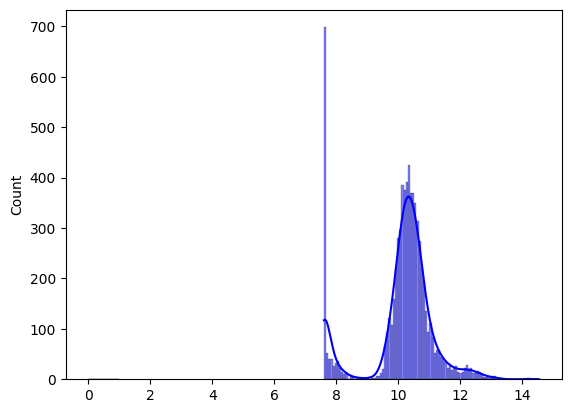

In [167]:
sns.histplot(y_pred,color='red' ,bins=100, kde=True)
sns.histplot(y_train,color='blue' ,bins=100, kde=True)


# 2.9 **RMSE**

it is the root means squared error which by the name represents the error which is difference bw the predicted and actual values squared and averaged and then take square root.   sq(avg((ypred - yactual)2))

In [168]:
def rmse(y,y_pred):
  se = (y-y_pred)**2
  mse = se.mean()
  return np.sqrt(mse)

In [169]:
rmse(y_train,y_pred)

nan

# 2.10 validation


In [170]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']


In [171]:
def prepare_X(df,base):
  df_num = df[base]
  df_num = df_num.fillna(0)
  x = df_num.values
  return x

In [172]:
x_train = prepare_X(df_train,base)
w0,w = lr_train(x_train,y_train)

x_val = prepare_X(df_val,base)
y_pred = w0 + x_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [173]:
rmse(y_val,y_pred)

0.761653099130156

# 2.11 Feature Engineering

In [174]:
def prepare_X(df,base):
  df = df.copy()
  df['age'] = 2017 - df.year
  features = base + ['age']
  df_num = df[features]
  df_num = df_num.fillna(0)
  x = df_num.values
  return x

In [175]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [176]:
X_train = prepare_X(df_train,base)
w0,w = lr_train(X_train,y_train)

X_val = prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5172055461058299

<Axes: ylabel='Count'>

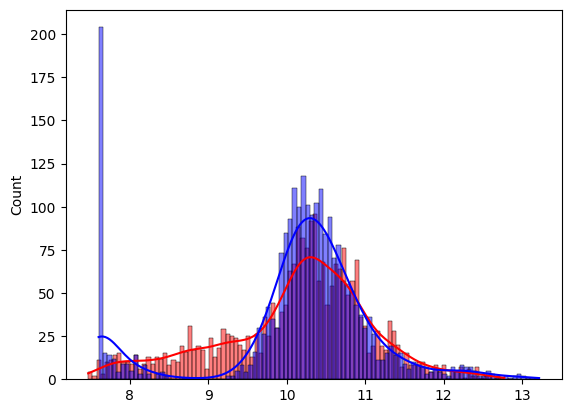

In [177]:
sns.histplot(y_pred,color='red' ,bins=100, kde=True)
sns.histplot(y_val,color='blue' ,bins=100, kde=True)

##  

# 2.12 Categorical Variables

In [178]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [179]:
for v in [2,3,4]:
  df_train['num_doors_%s' % v ] = (df_train.number_of_doors == v).astype('int')

In [180]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [181]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [182]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features = base + ['age']
  for v in [2,3,4]:
    df['num_doors_%s' % v ] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v )
  for v in makes:
    df['make_%s' % v ] = (df.make == v).astype('int')
    features.append('make_%s' % v )
  df_num = df[features]
  df_num = df_num.fillna(0)
  x = df_num.values
  return x

In [183]:
prepare_X(df_train)


array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]])

In [184]:
X_train = prepare_X(df_train)
w0,w = lr_train(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5076038849556795

In [185]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [186]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_doors_2', 'num_doors_3',
       'num_doors_4'],
      dtype='object')

In [187]:
categorical_variables = ['make','engine_fuel_type','transmission_type','driven_wheels','number_of_doors','market_category','vehicle_size','vehicle_style']

In [188]:
categories = {}
for c in categorical_variables:
  categories[c] = list(df_train[c].value_counts().head().index)

In [189]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'number_of_doors': [4.0, 2.0, 3.0],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [190]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features = base + ['age']
  for c,values in categories.items():
    for v in values:
      df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
      features.append('%s_%s' % (c,v))
  df_num = df[features]
  df_num = df_num.fillna(0)
  x = df_num.values
  return x

In [191]:
X_train = prepare_X(df_train)
w0,w = lr_train(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

27.18915721689535

In [192]:
w

array([ 7.26452861e-02, -2.34230754e+01, -2.28794399e+00, -1.79180204e+00,
        5.73541034e-05, -1.11020819e+00, -1.37123198e+00, -7.88887272e+00,
        5.94173404e+00,  1.52628150e+00, -8.07294120e+00, -3.67400081e+01,
       -3.32474099e+01, -3.52274072e+01, -4.00131254e+01, -4.26386065e+01,
       -1.78687165e+15, -1.78687165e+15, -1.78687165e+15, -1.78687165e+15,
       -1.78687165e+15,  8.52146759e+14,  8.52146759e+14,  8.52146759e+14,
        8.52146759e+14,  3.83085696e+00,  6.58827592e+00,  4.18105751e+00,
        1.43849746e+00, -2.33539736e+00, -2.67559102e+00,  6.06323532e+00,
       -1.33383860e+00,  2.50356696e+01,  3.30798805e+01,  4.27571308e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

# 2.13 regularisation

In [193]:
def lr_trainreg(x,y,r = 0.001):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones,x])
  xtx = x.T.dot(x)
  xtx = xtx + r * np.eye(xtx.shape[0])
  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)
  return w_full[0],w_full[1:]

In [194]:
X_train = prepare_X(df_train)
w0,w = lr_trainreg(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.4565175084417528

# 2.14 Tuning the model

In [195]:
for r in [0, 0.00001,0.0001,0.001,0.1,1,10]:
  X_train = prepare_X(df_train)
  w0,w = lr_trainreg(X_train,y_train,r=r)
  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val,y_pred)
  print(r,w0,score)

0 934724888510266.1 27.18915721689535
1e-05 2.915086784650303 0.4565170243365859
0.0001 6.180219360930174 0.45651706162898587
0.001 6.284939453806074 0.4565175084417528
0.1 6.191208663181603 0.4565692763032054
1 5.634896667689915 0.4572204317996414
10 4.283980108971695 0.47014569320985455


# 2.15 Using the model

In [198]:
df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train,y_val])

In [199]:
w0,w = lr_trainreg(prepare_X(df_full_train),y_full_train,r=0.001)

In [202]:
w0

6.3221390349374875

In [203]:
x_test = prepare_X(df_test)
y_pred = w0 + x_test.dot(w)
rmse(y_test,y_pred)

0.4517749307105875

In [204]:
df_test.iloc[12]

,12
make,cadillac
model,dts
year,2009
engine_fuel_type,regular_unleaded
engine_hp,275.0
engine_cylinders,8.0
transmission_type,automatic
driven_wheels,front_wheel_drive
number_of_doors,4.0
market_category,luxury


In [221]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [222]:
df_small = pd.DataFrame(car,index=[0])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [225]:
x_small = prepare_X(df_small)
y_small = w0 + x_small.dot(w)
np.expm1(y_small[0])

34983.196645805874

In [223]:
np.expm1(y_test[20])

35000.00000000001

<Axes: ylabel='Count'>

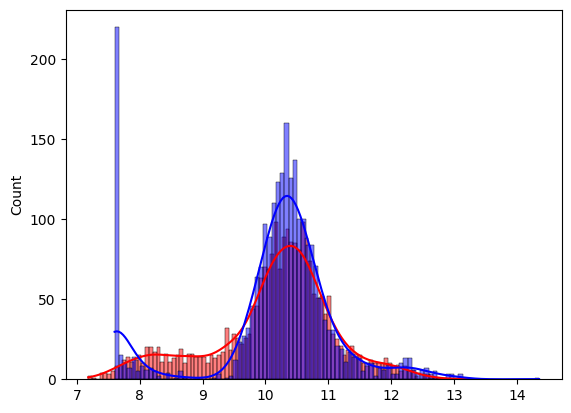

In [226]:
sns.histplot(y_pred,color='red' ,bins=100, kde=True)
sns.histplot(y_test,color='blue' ,bins=100, kde=True)